### Tugas

Import Library

In [1]:
# For data manipulation
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

# For SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#### 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, "voice.csv."

Load Dataset

In [3]:
df = pd.read_csv('./data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Data Preprocessing

In [7]:
# Encode 'label' column to numerical values (0 for 'male', 1 for 'female')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [8]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [9]:
df.shape

(3168, 21)

In [10]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [11]:
df.describe()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

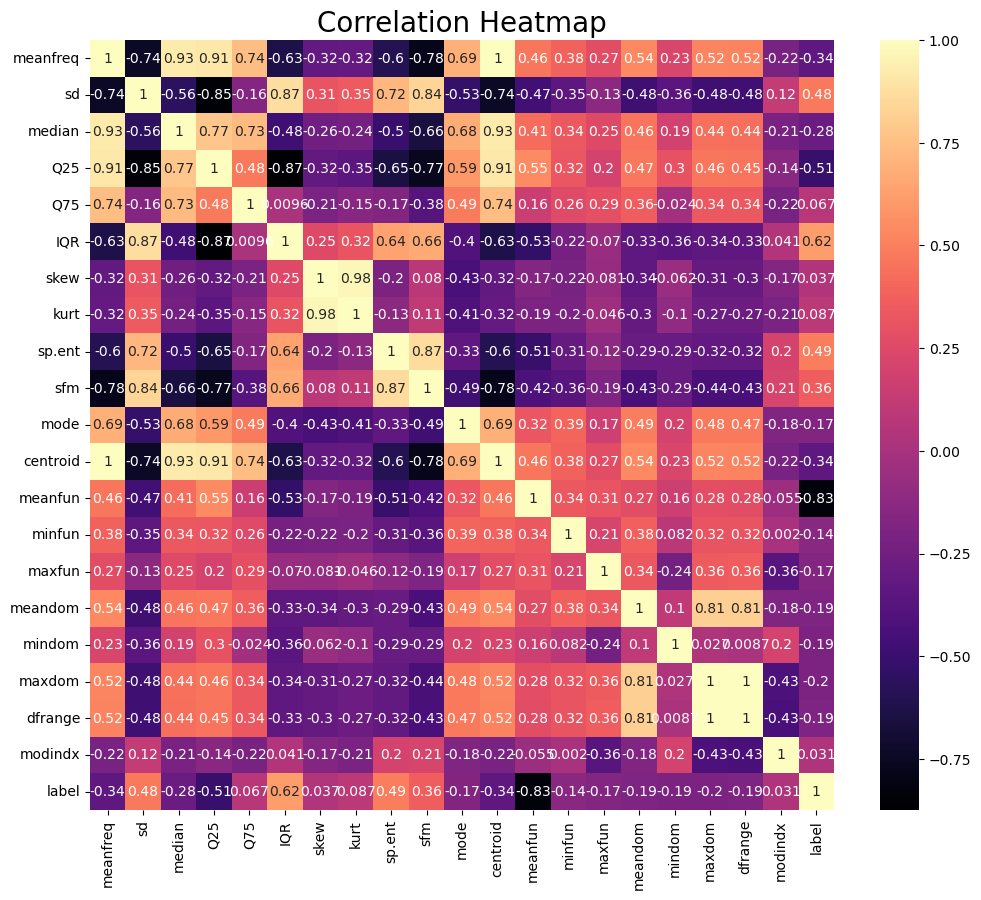

In [12]:
# Creating heatmap for correlation between features
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='magma')
plt.title('Correlation Heatmap', fontsize=20)

In [13]:
corr_rank = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
print(corr_rank[corr_rank['level_0'] == 'label'])

    level_0   level_1         0
22    label     label  1.000000
45    label   meanfun  0.833921
90    label       IQR  0.618916
120   label       Q25  0.511455
125   label    sp.ent  0.490552
136   label        sd  0.479539
206   label       sfm  0.357499
226   label  meanfreq  0.337415
227   label  centroid  0.337415
288   label    median  0.283919
349   label    maxdom  0.195657
354   label    mindom  0.194974
360   label   dfrange  0.192213
364   label   meandom  0.191067
374   label      mode  0.171775
379   label    maxfun  0.166461
392   label    minfun  0.136692
408   label      kurt  0.087195
418   label       Q75  0.066906
427   label      skew  0.036627
430   label   modindx  0.030801


In [14]:
# Separate features (X) and labels (y)
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels

Spliting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train SVM Model

In [18]:
# Train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Predict Data Test

In [19]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

Evaluate Model

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9416403785488959


In [21]:
# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[265  32]
 [  5 332]]


In [22]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       297
           1       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    a. Menggunakan data spam.csv
    b. Fitur CountVectorizer dengan mengaktifkan stop_words
    c. Evaluasi hasilnya

Load Data

In [23]:
df2 = pd.read_csv('./data/spam.csv', encoding='latin-1')
df2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data preprocessing

In [24]:
df2 = df2.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df2.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# Rename Columns

new_cols = {
	'v1': 'labels',
	'v2': 'SMS'
} 

df2 = df2.rename(columns=new_cols)
df2.head()

,labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df2.value_counts('labels')

labels
ham     4825
spam     747
dtype: int64

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
df2.describe()

,labels,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
new_label = {
	'ham': 0,
	'spam': 1
}

df2['labels'] = df2['labels'].map(new_label)
df2.head()

,labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Seperate feature and target

In [30]:
X = df2['SMS'].values
y = df2['labels'].values

Vectorize feature

In [31]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


Spliting Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Data

In [33]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print('Accuracy on train data: ', acc_train)
print('Accuracy on test data: ', acc_test)

Accuracy on train data:  0.9950639443571909
Accuracy on test data:  0.9802690582959641


### Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur TF-IDF dengan mengaktifkan stop_words
3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [34]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [35]:
X = df2['SMS'].values
y = df2['labels'].values

X = tfidf_vectorizer.fit_transform(X)

In [36]:
print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


Spliting Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training data

In [38]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print('Accuracy on train data: ', acc_train)
print('Accuracy on test data: ', acc_test)

Accuracy on train data:  0.9811532420910927
Accuracy on test data:  0.968609865470852
